<center>
<![image.png](attachment:image.png)>
<img src="https://scontent.flis7-1.fna.fbcdn.net/v/t39.30808-6/327345211_708012977623591_5371889953719216000_n.png?_nc_cat=104&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeGA4Epi5DPgQWGmwJnzDzYwlTHqnE4dPp2VMeqcTh0-ndnVzTPGmZ1C7LYJvEsh0wc&_nc_ohc=eYml-GYudcEAX9U9ExD&_nc_ht=scontent.flis7-1.fna&oh=00_AfAgCk0A9S9vX7079OukWAoqEYq0-hGrKIHFbkcpZIhmpA&oe=6535741F" width="570" height="250"/></left>
<h1><center><font size=8>Analysing papers from Scopus</center></font></h1>
<h1><center>Pre-Processing </center></h1>
________________________________________________________________________________________________________

In [25]:
# Import libraries
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt

from gensim.corpora import Dictionary
from gensim.models import LdaModel


# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



4. Data Transformation
Normalization: Scale numerical features like 'Year', 'Citation count' to bring them into a similar range.
Aggregation: If you're interested in author-level or journal-level metrics, aggregate the data accordingly.

5. Data Split
Train-Test Split: Divide the data into training and test sets for model evaluation.

6. Save Preprocessed Data
Save the preprocessed data into a new CSV file or a different format suitable for machine learning algorithms.
Python Libraries You Can Use
Pandas: For data manipulation and cleaning.
NLTK or SpaCy: For text preprocessing.
Scikit-learn: For feature engineering and machine learning models

# Installing Libraries

In [62]:
# Installing Necessary Libraries

#!pip install pandas
#!pip install numpy
#!pip install nltk
#!pip install spacy
#!pip install scikit-learn
# pip install contractions

# Importing libraries
import pandas as pd
import numpy as np
import nltk
import spacy
import sklearn

import re
import contractions
nltk.download('punkt')
nltk.download('all')
from nltk.corpus import stopwords
from nltk import word_tokenize
# Used in Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk import pos_tag


from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
# Wordcloud to check the most used words and add appropriate ones to the stopwords list
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\JLM\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-da

# Loading Data 

In [27]:
# Load the CSV file into a DataFrame
df = pd.read_csv('scopus.csv')


## Understanding the dataset

In [28]:
# Checking the shape of the dataset
df.shape

(357, 25)

In [29]:
# View the first 5 rows of the dataset
df.head(3)

Authors  \
0  Muzzall E.; Abraham V.; Nakao R.   
1       Keikhosrokiani P.; Asl M.P.   
2                             Li M.   

                                   Author full names  \
0  Muzzall, Evan (57215317809); Abraham, Vijoy (5...   
1  Keikhosrokiani, Pantea (54420191700); Asl, Mou...   
2                            Li, Manyu (36028501600)   

                            Author(s) ID  \
0  57215317809; 57933915400; 56504910800   
1               54420191700; 57190254358   
2                            36028501600   

                                               Title  Year  \
0  A perspective on computational research suppor...  2022   
1  Handbook of research on artificial intelligenc...  2022   
2  Teaching beginner-level computational social s...  2023   

                                        Source title Volume Issue Art. No.  \
0   Journal of Librarianship and Information Science    NaN   NaN      NaN   
1  Handbook of Research on Artificial Intelligenc...    NaN   NaN      NaN   
2                             Frontiers in Education      8   NaN  1130865   

  Page start  ...                                       Affiliations  \
0        NaN  ...                 Stanford University, United States   
1          1  ...  School of Computer Sciences, Universiti Sains ...   
2        NaN  ...  Department of Psychology, University of Louisi...   

                           Authors with affiliations  \
0  Muzzall E., Stanford University, United States...   
1  Keikhosrokiani P., School of Computer Sciences...   
2  Li M., Department of Psychology, University of...   

                                            Abstract  \
0  Presentation of data is a major component to a...   
1  Artificial intelligence has been utilized in a...   
2  The article presents the use of open, inclusiv...   

                                     Author Keywords Index Keywords  \
0  Archival research; computational research supp...            NaN   
1                                                NaN            NaN   
2  computational social science; pedagogy; R prog...            NaN   

  Language of Original Document Document Type Publication Stage  \
0                       English       Article  Article in press   
1                       English          Book             Final   
2                       English       Article             Final   

                         Open Access  Source  
0                                NaN  Scopus  
1                                NaN  Scopus  
2  All Open Access; Gold Open Access  Scopus  

[3 rows x 25 columns]

In [30]:
# View the last five rows of the dataset
df.tail(5)

Authors  \
352                       Ossebaard H.C.   
353  Seresinhe C.I.; Preis T.; Moat H.S.   
354         Jiang F.; Leung C.K.; Liu D.   
355   Lassen N.B.; Madsen R.; Vatrapu R.   
356                                  NaN   

                                     Author full names  \
352                   Ossebaard, Hans C. (36787259600)   
353  Seresinhe, Chanuki Illushka (56976447200); Pre...   
354  Jiang, Fan (36104297200); Leung, Carson K. (74...   
355  Lassen, Niels Buus (56727735100); Madsen, Rene...   
356                                                NaN   

                              Author(s) ID  \
352                            36787259600   
353  56976447200; 14066361400; 55185006100   
354   36104297200; 7402612526; 56335778800   
355  56727735100; 56727804400; 23399280500   
356                                    NaN   

                                                 Title  Year  \
352                             One health informatics  2014   
353  Quantifying the link between art and property ...  2016   
354  Efficiency Improvements in Social Network Comm...  2015   
355         Predicting iPhone Sales from iPhone Tweets  2014   
356  WebSci 2016 - Proceedings of the 2016 ACM Web ...  2016   

                                          Source title         Volume  \
352  WWW 2014 Companion - Proceedings of the 23rd I...            NaN   
353                         Royal Society Open Science              3   
354  Proceedings - 2015 IEEE International Conferen...            NaN   
355  Proceedings . IEEE 18th international Enterpri...  2014-December   
356  WebSci 2016 - Proceedings of the 2016 ACM Web ...            NaN   

        Issue Art. No. Page start  ...  \
352       NaN      NaN        669  ...   
353         4   160146        NaN  ...   
354       NaN  7396498        161  ...   
355  December  6972053         81  ...   
356       NaN      NaN        NaN  ...   

                                          Affiliations  \
352  Dept. of Medical Microbiology, University Medi...   
353  Data Science Laboratory, Behavioural Science W...   
354  Department of Computer Science, University of ...   
355  Computational Social Science Laboratory, Depar...   
356                                                NaN   

                             Authors with affiliations  \
352  Ossebaard H.C., Dept. of Medical Microbiology,...   
353  Seresinhe C.I., Data Science Laboratory, Behav...   
354  Jiang F., Department of Computer Science, Univ...   
355  Lassen N.B., Computational Social Science Labo...   
356                                                NaN   

                                              Abstract  \
352  Zoonoses are a class of infectious diseases ca...   
353  Is there an association between art and change...   
354  As we are living in a "smart world" (which com...   
355  Recent research in the field of computational ...   
356  The proceedings contain 65 papers. The topics ...   

                                       Author Keywords  \
352  Digital epidemiology; One health; Public healt...   
353  Art; Computational social science; Data scienc...   
354  big data; cyber and physical worlds; data inte...   
355  computational social science; Data science; ip...   
356                                                NaN   

                                        Index Keywords  \
352  Health; Information science; Public health; Wo...   
353                                                NaN   
354  Data mining; Efficiency; Information dissemina...   
355  Behavioral research; Data Analytics; Data Scie...   
356                                                NaN   

    Language of Original Document      Document Type Publication Stage  \
352                       English   Conference paper             Final   
353                       English            Article             Final   
354                       English   Conference paper             Final   
355                     

In [31]:
# Get information about the df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        352 non-null    object 
 1   Author full names              352 non-null    object 
 2   Author(s) ID                   352 non-null    object 
 3   Title                          357 non-null    object 
 4   Year                           357 non-null    int64  
 5   Source title                   357 non-null    object 
 6   Volume                         217 non-null    object 
 7   Issue                          143 non-null    object 
 8   Art. No.                       105 non-null    object 
 9   Page start                     239 non-null    object 
 10  Page end                       236 non-null    object 
 11  Page count                     243 non-null    float64
 12  Cited by                       357 non-null    int

# **1. Data Cleaning**
Remove Duplicates: Ensure that there are no duplicate entries.
Handle Missing Values: Decide how to handle missing data. You could either remove such entries or fill them in with a default value.
Standardize Text: Convert all text to lowercase, remove special characters, etc.


In [32]:
# Get descriptive stats about the df
df.describe().T

count         mean         std     min     25%     50%     75%  \
Year        357.0  2019.781513    2.470590  2013.0  2018.0  2020.0  2022.0   
Page count  243.0    46.650206  114.316424     1.0     6.0    11.0    19.0   
Cited by    357.0    12.406162   36.815899     0.0     0.0     3.0     9.0   

               max  
Year        2023.0  
Page count  1004.0  
Cited by     503.0

In [33]:
# Checking for duplicate values
df.duplicated().sum()

0

In [34]:
# Checking for missing values
df.isna().sum()

Authors                            5
Author full names                  5
Author(s) ID                       5
Title                              0
Year                               0
Source title                       0
Volume                           140
Issue                            214
Art. No.                         252
Page start                       118
Page end                         121
Page count                       114
Cited by                           0
DOI                               16
Link                               0
Affiliations                      11
Authors with affiliations         11
Abstract                           0
Author Keywords                   56
Index Keywords                   152
Language of Original Document      0
Document Type                      0
Publication Stage                  0
Open Access                      179
Source                             0
dtype: int64

In [35]:
# Get the number of duplicates
duplicate = df['Abstract'].duplicated().sum()
duplicate

8

In [36]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Abstract'])
df.shape


(349, 25)

# **2. Text Preprocessing**
For Abstracts, Titles, Keywords
Tokenization: Break down text into words, phrases, symbols, or other meaningful elements.
Stopword Removal: Remove common words that may not add much meaning in text analysis.
Stemming/Lemmatization: Reduce words to their root form.
For Categorical Data (e.g., Author names, Affiliations, Source title)
Encoding: Convert categories into integers or one-hot encoded vectors.
The clean_text function you've provided aims to perform a series of text preprocessing steps on a given text string (df, which is a bit misleading as it's usually used to denote a DataFrame). These steps include:
The contractions library in Python is used for expanding English contractions. A contraction is a shortened form of one or two words (one of which is usually a verb). For example, "can't" is a contraction for "cannot," and "I'll" is a contraction for "I will" or "I shall."
- Removing URLs
- Removing HTML tags
- Removing punctuations
- Converting text to lowercase
- Removing stopwords
- Applying a custom list of stopwords
- Removing extra whitespaces
- Tokenizing the text
- Removing numbers
- Lemmatizing the text
- Stemming the text
- Fixing contractions

**Import Statements:** Make sure to import all the necessary modules and packages at the beginning of your script, such as re for regular expressions, nltk for stopwords and tokenization, and WordNetLemmatizer for lemmatization.

- #import re
- #from nltk.corpus import stopwords
- #from nltk.tokenize import word_tokenize
- #from nltk.stem import WordNetLemmatizer
- #import contractions

In [37]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Fix contractions
    final_string = ' '.join([contractions.fix(word) for word in stemmed_words])

    return final_string

In [38]:
#converts all the values in a specific columns of the DataFrame data to strings 
df["Abstract"] = df["Abstract"].astype(str) 

#Applying a Text Cleaning Function
df['clean_Abstract'] = df['Abstract'].apply(clean_text)

In [39]:
#... aims to create a new DataFrame called selected_columns that contains only the "Abstract" and "clean_Abstract" columns from the original DataFrame df. Then, it displays the first 20 rows of this new DataFrame using the .head(20) method.
selected_columns = df[['Abstract', 'clean_Abstract']]
selected_columns.head(20)


Abstract  \
0   Presentation of data is a major component to a...   
1   Artificial intelligence has been utilized in a...   
2   The article presents the use of open, inclusiv...   
3   Learning analytics aims at helping the student...   
4   The growing amount of data and advances in dat...   
5   The use of data from smartphones and wearable ...   
6   This research aims to identify potential at-ri...   
7   Purpose: Data librarianship, or data-driven li...   
8   This paper explores the extent to which gender...   
9   Social scientists with data science skills inc...   
10  Various ‘Data for Good’ and ‘AI for Good’ init...   
11  Causal inference is a fundamental concept that...   
12  This study highlights the scientific legacy an...   
13  The era of behavioural big data has created ne...   
14  Possible for science itself, conceptually, to ...   
15  Purpose: Data science industry is a multidisci...   
16  Text as Data represents a major advance for te...   
17  Social interactions have been exclusive to hum...   
18  With the advancement of data science and AI, m...   
19  This book offers an introduction to applied st...   

                                       clean_Abstract  
0   outlin succeed work result continu need librar...  
1   academician util textual discov opinion book k...  
2   over inclus face pedagogi design li also under...  
3   earli highli phase baselin predict result indi...  
4   outlin secur platform report nation kind provi...  
5   allianc digit clinicianreport bia unison inequ...  
6   contribut naiv predict result knn dt among alg...  
7   appreci earli grasp originalityvalu respons pr...  
8   make factor scholarship bia find observ extent...  
9   american cs question curriculum conclud previo...  
10  program topic step situat ai promot debat rece...  
11  highli licens infer overview estim fair ai ena...  
12  licens twitter life attent result public award...  
13  isol wellb encourag conduct consequ platform t...  
14  licens foundat differ basic alon adapt comment...  
15  uncov originalityvalu respons structur maximum...  
16  digit measur societi life text review design s...  
17  contribut file requir rare human usag allegedl...  
18  secur ownerauthor refer societi fair work resu...  
19  licens disciplinari proport text estim cover i...

In [40]:
#print(df[['Abstract', 'clean_Abstract']].head(2).to_string(max_colwidth=100))


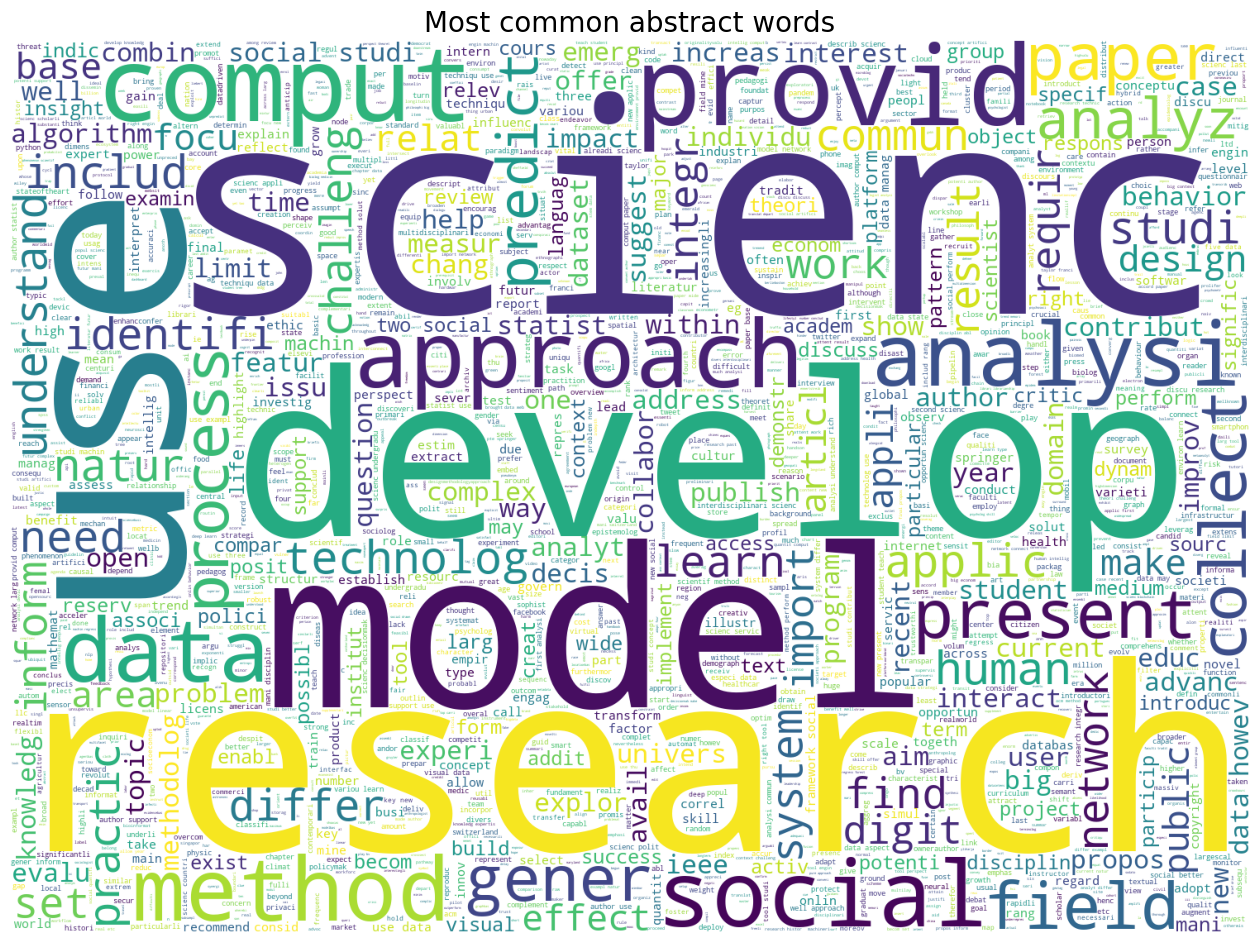

In [41]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(df["clean_Abstract"]))
plt.title("Most common abstract words", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

In [42]:
stopwords_abs = []  # Initialize the list

# Adding some of the words to the stopwords list 
stopwords_to_remove = ['provide', 'approach', 'analysis']
stopwords_abs.extend(stopwords_to_remove)  # Now you can extend it

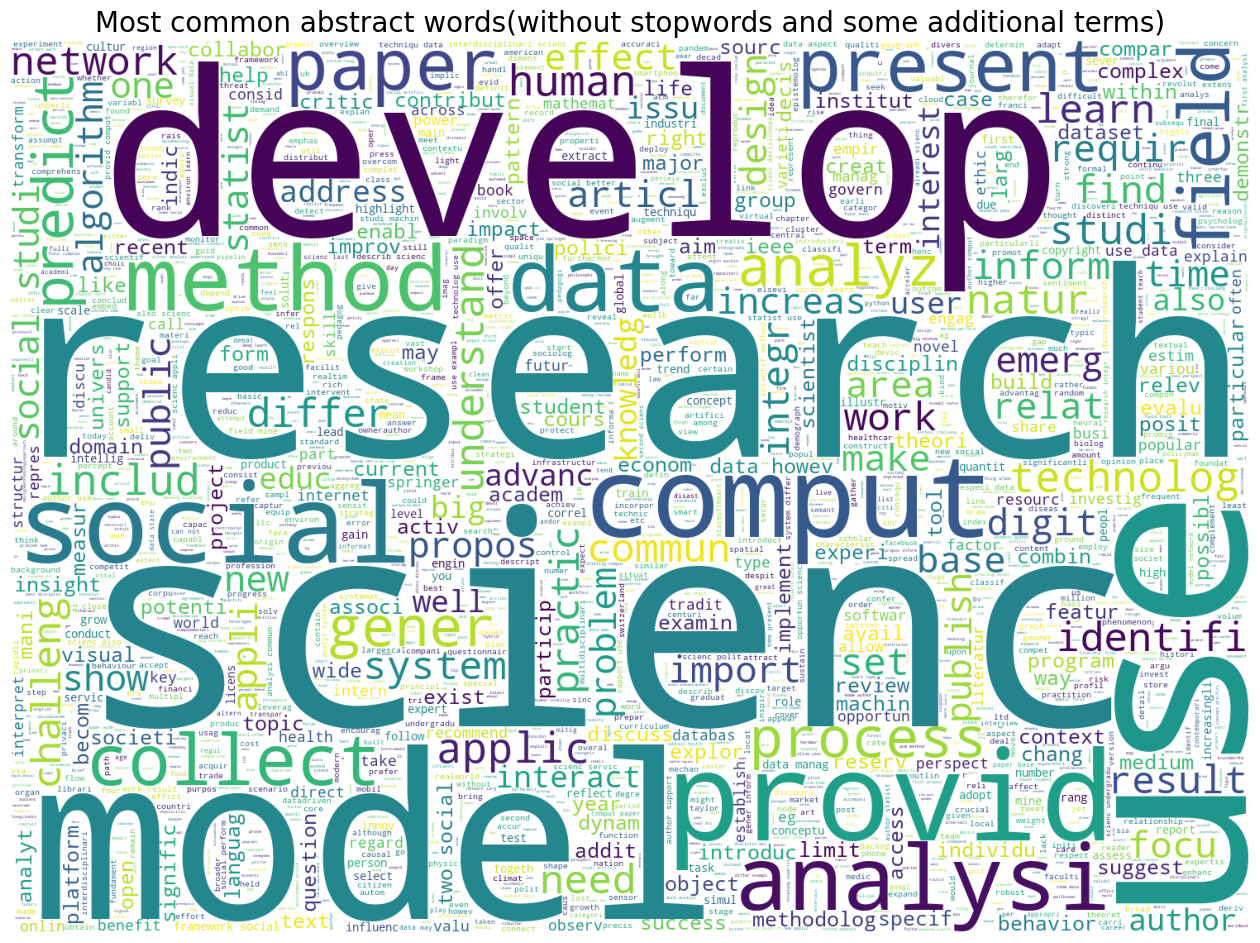

In [43]:
# Create Wordcloud with removed stopwords
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=stopwords_abs,
                          height=1080).generate(" ".join(df.clean_Abstract))
plt.title("Most common abstract words(without stopwords and some additional terms)", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

# **3. Feature Engineering**

Feature engineering or representing text is a crucial step in the Natural Language Processing (NLP) pipeline. It involves transforming raw text into a format that can be easily understood by machine learning algorithms. Here's a brief overview of some common techniques

- Vectorizing Data: Bag-Of-Words
- Vectorizing Data: N-Grams
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Part of Speech (POS) tagging

-**Vectorizing Data:** Bag-Of-Words (BoW)
The Bag-of-Words model is one of the simplest ways to represent text data numerically. It involves converting each document into a vector that represents the frequency of each unique word in a predefined vocabulary. The model disregards the order of words, focusing solely on their occurrence.

-**Vectorizing Data: N-Grams**
N-Grams are contiguous sequences of 'n' items from a given text. Unlike BoW, which considers each word independently, N-Grams capture some context by considering sequences of words. For example, bigrams (2-grams) consider pairs of consecutive words, thereby capturing some of the text's local structure.

-**Term Frequency-Inverse Document Frequency (TF-IDF)**
TF-IDF is an extension of the BoW model that takes into account not just the frequency of a word in a particular document (Term Frequency), but also how unique the word is across all documents (Inverse Document Frequency). This helps in giving more weight to words that are more informative.

-**Part of Speech (POS) Tagging**
POS tagging involves identifying the grammatical categories (such as nouns, verbs, adjectives, etc.) of the words in a sentence. This can be useful in understanding the syntactic and semantic roles of words in the text, and can serve as an additional feature for text classification tasks

## **Bag-Of-Words**

In [44]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'clean_Abstract' column
X = vectorizer.fit_transform(df['clean_Abstract'])

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the resulting DataFrame
print(bow_df)


     aalto  aardrijkskundig  abandon  abat  abbott  abbrevi  abduct  abil  \
0        0                0        0     0       0        0       0     0   
1        0                0        0     0       0        0       0     0   
2        0                0        0     0       0        0       0     0   
3        0                0        0     0       0        0       0     0   
4        0                0        0     0       0        0       0     1   
..     ...              ...      ...   ...     ...      ...     ...   ...   
344      0                0        0     0       0        0       0     0   
345      0                0        0     0       0        0       0     0   
346      0                0        0     0       0        0       0     0   
347      0                0        0     0       0        0       0     0   
348      0                0        0     0       0        0       0     0   

     abl  abnorm  ...  youth  youtub  zachari  zebra  zero  zeta  zettabyt 

*Bar Plot for Most Common BoW*

You can use a bar plot to visualize the most common BoW in the corpus.

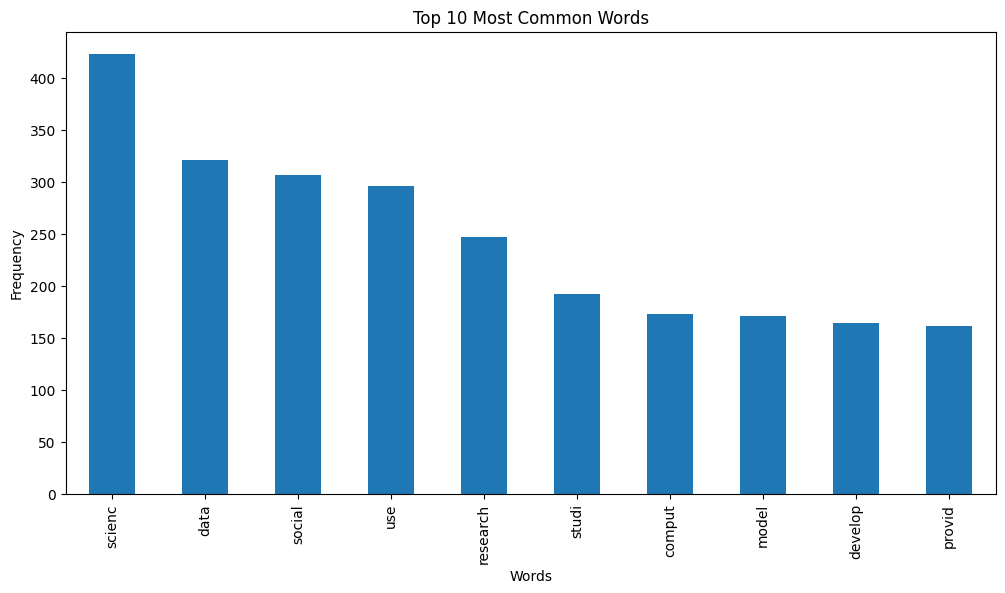

In [21]:
# Sum up the counts of each word
sum_words = bow_df.sum(axis=0)

# Sort and select top 10 words
sorted_words = sum_words.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_words.plot(kind='bar')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


*Word Cloud*

A word cloud can also be used to visualize the BoW

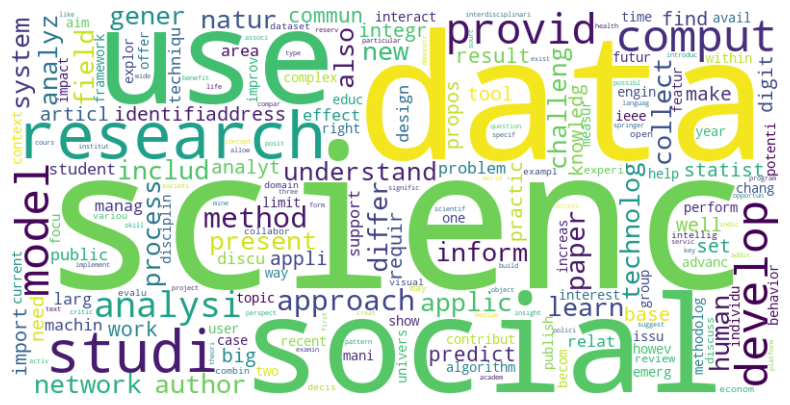

In [45]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_words)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **N-Grams (2 bigram)**

In [46]:
# Initialize CountVectorizer with bigram parameter
vectorizer = CountVectorizer(ngram_range=(2, 2))  # For bigrams

# Fit and transform the cleaned abstracts
X = vectorizer.fit_transform(df['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
ngram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(ngram_df.sample(5))

     aalto hindranc  aardrijkskundig matur  abandon creat  abat compani  \
65                0                      0              0             0   
61                0                      0              0             0   
0                 0                      0              0             0   
20                0                      0              0             0   
115               0                      0              0             0   

     abbott struggl  abbrevi uk  abduct mind  abduct progress  abil area  \
65                0           0            0                0          0   
61                0           0            0                0          0   
0                 0           0            0                0          0   
20                0           0            0                0          0   
115               0           0            0                0          0   

     abil conclud  ...  youtub identifi  youtub spread  zachari element  \
65              0

*Bar Plot for Most Common N-Grams*

You can use a bar plot to visualize the most common N-grams in the corpus.

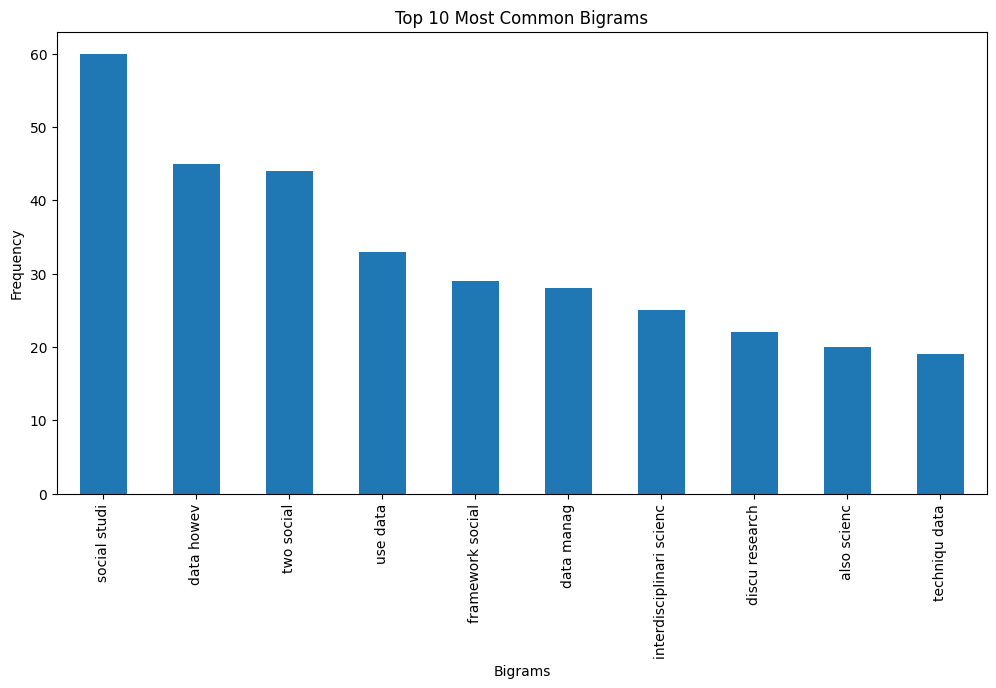

In [47]:
# Sum up the counts of each bigram
sum_bigrams = ngram_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_bigrams = sum_bigrams.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_bigrams.plot(kind='bar')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()


*Word Cloud*

A word cloud can also be used to visualize the N-grams, although it's generally better for unigrams.

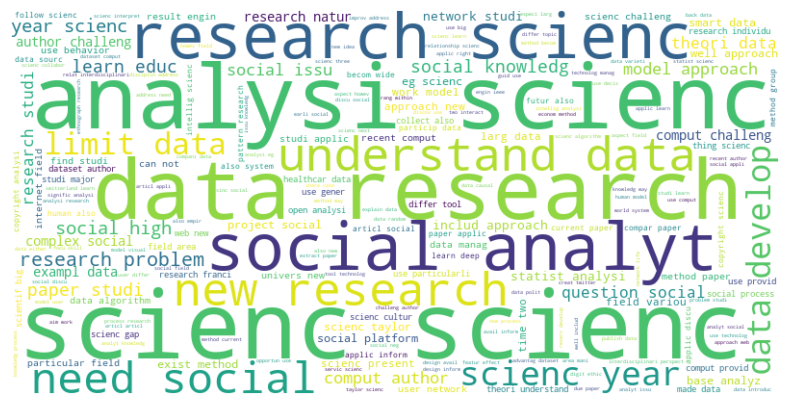

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_bigrams)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Term Frequency-Inverse Document Frequency (TF-IDF)**

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame
df = pd.DataFrame({
    'clean_Abstract': ['along use continu analyz', 'languag result help present', 'use fulfil highlight face']
})

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


      along    analyz   continu      face    fulfil  help  highlight  languag  \
0  0.528635  0.528635  0.528635  0.000000  0.000000   0.0   0.000000      0.0   
1  0.000000  0.000000  0.000000  0.000000  0.000000   0.5   0.000000      0.5   
2  0.000000  0.000000  0.000000  0.528635  0.528635   0.0   0.528635      0.0   

   present  result      use  
0      0.0     0.0  0.40204  
1      0.5     0.5  0.00000  
2      0.0     0.0  0.40204  


*Bar Plot for Most Common TF-IDF*

You can use a bar plot to visualize the most common TF-IDF in the corpus.

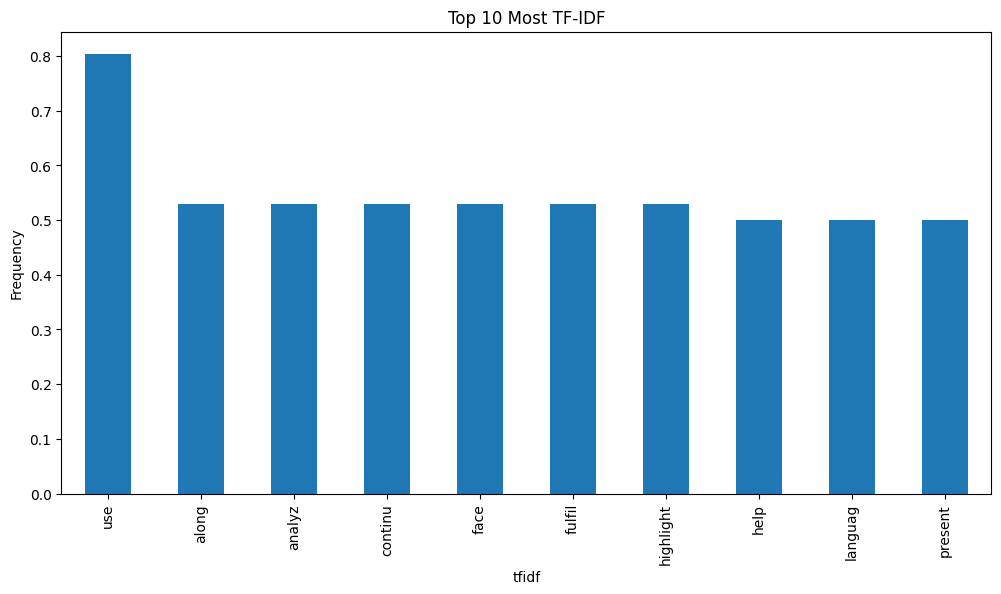

In [59]:
# Sum up the counts of each bigram
sum_tfidf = tfidf_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_tfidf = sum_tfidf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_tfidf.plot(kind='bar')
plt.title('Top 10 Most TF-IDF')
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show()


*Word Cloud*

A word cloud can also be used to visualize the TF-IDF

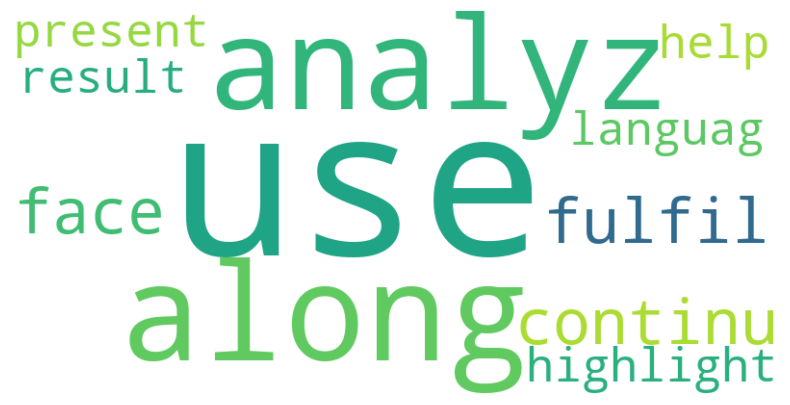

In [60]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_tfidf)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Part of Speech (POS) Tagging**

In [63]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
df['POS_Tagged_Abstract'] = df['clean_Abstract'].apply(pos_tag_sentence)

# Display the DataFrame
print(df[['clean_Abstract', 'POS_Tagged_Abstract']].head())


                clean_Abstract  \
0     along use continu analyz   
1  languag result help present   
2    use fulfil highlight face   

                                 POS_Tagged_Abstract  
0  [(along, IN), (use, NN), (continu, NN), (analy...  
1  [(languag, NN), (result, NN), (help, NN), (pre...  
2  [(use, NN), (fulfil, NN), (highlight, VBD), (f...  


**Frequency Distribution of POS Tags**

Bar chart to show the frequency distribution of different POS tags across all abstracts.

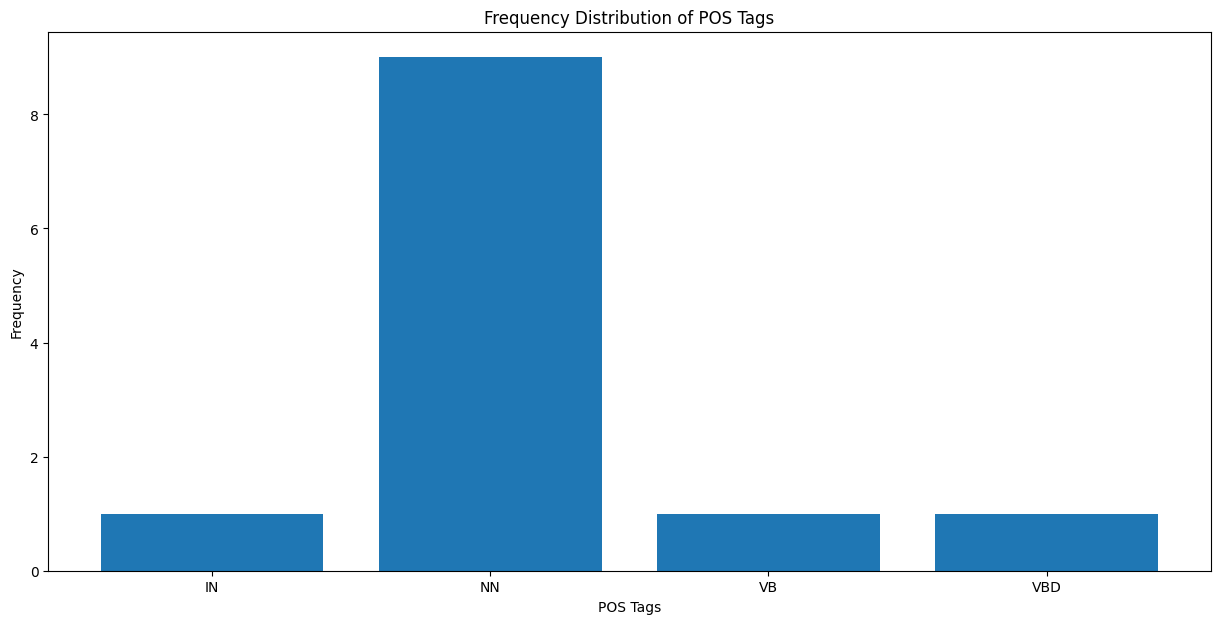

In [65]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Flatten the list of all POS tags from all abstracts
all_tags = list(itertools.chain.from_iterable(df['POS_Tagged_Abstract'].apply(lambda x: [tag for word, tag in x])))

# Count the frequency of each POS tag
tag_freq = Counter(all_tags)

# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of POS Tags')
plt.show()


In [69]:
# Display the first few rows of the DataFrame
df[['clean_Abstract', 'POS_Tagged_Abstract']].head()


clean_Abstract  \
0     along use continu analyz   
1  languag result help present   
2    use fulfil highlight face   

                                 POS_Tagged_Abstract  
0  [(along, IN), (use, NN), (continu, NN), (analy...  
1  [(languag, NN), (result, NN), (help, NN), (pre...  
2  [(use, NN), (fulfil, NN), (highlight, VBD), (f...

**Pie Chart for Overall Tag Distribution**

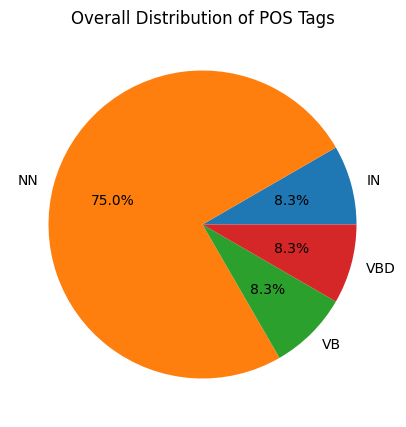

In [72]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(tag_freq.values(), labels=tag_freq.keys(), autopct='%1.1f%%')
plt.title('Overall Distribution of POS Tags')
plt.show()


# 4. Modelling